In [2]:
import numpy as np

In [3]:
class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ------------------
    alpha: float
        Learning rate
        
    n_iter: int
        Passes over the training dataset.
        
    Attributes
    ------------------
    w_: 1d-array
        Weights after fitting
        
    errors_: list
        Number of misclassifications in every epoch
    
    """
    
    def __init__(self, alpha =0.01, n_iter=10):
        self.alpha = alpha
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ------------------
        X: {array-like}, shape = [n_sample, n_features]
            Training vectors, where n_samples is the number of samples and n_features is the number of features
        
        y: array-like, shape = [n_sample]
            Target values
            
        Returns
        ------------------
        self: object
        
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            
            for xi, target in zip(X, y):
                update = self.alpha * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                
                errors += int(update != 0.0)
                
            self.errors_.append(errors)
    
        return self
    
    def netInput(self, X):
        """ calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.netInput(X) >= 0.0, 1, -1)
    
    
    

In [4]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
import matplotlib.pyplot as plt

In [7]:
y = df.iloc[0:100, 4].values

In [8]:
y = np.where( y == 'Iris-setosa', -1, 1)

In [9]:
X = df.iloc[0:100, [0, 2]].values

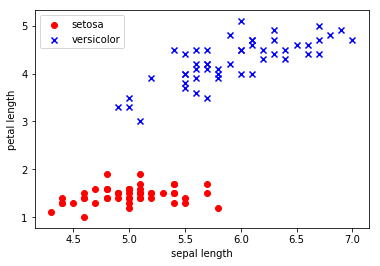

In [11]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

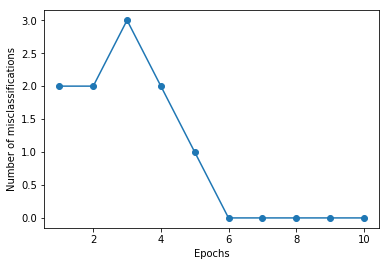

In [12]:
ppn = Perceptron(alpha=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()